In [24]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys

In [25]:
patho_df = pd.read_csv('clinvar_pathogenic.distances_from_TSS.csv', header=None, sep='\t')
patho_df.columns = ['chr', 'start', 'end', 'genomic_class', 'dist']
patho_df['abs_dist'] = abs(patho_df['dist'])
patho_df.head()

,chr,start,end,genomic_class,dist,abs_dist
0,chr1,10042756,10042757,utr,-14351,14351
1,chr1,11082793,11082794,utr,-808,808
2,chr1,11083407,11083408,utr,-194,194
3,chr1,11850738,11850739,utr,-269,269
4,chr1,11906063,11906064,utr,11,11


In [26]:
patho_df.shape

(523, 6)

In [27]:
controls_df = pd.read_csv('denovodb_benign.distances_from_TSS.csv', header=None, sep='\t')
controls_df.columns = ['chr', 'start', 'end', 'genomic_class', 'dist']
controls_df['abs_dist'] = abs(controls_df['dist'])
controls_df.head()

,chr,start,end,genomic_class,dist,abs_dist
0,chr1,758137,758138,intergenic,-4073,4073
1,chr1,839915,839916,intergenic,-270,270
2,chr1,920966,920967,intergenic,3459,3459
3,chr1,953120,953121,intergenic,161,161
4,chr1,1017926,1017927,utr,-4416,4416


In [28]:
controls_df.shape

(20030, 6)

In [29]:
controls_df.values

array([['chr1', 758137, 758138, 'intergenic', -4073, 4073],
       ['chr1', 839915, 839916, 'intergenic', -270, 270],
       ['chr1', 920966, 920967, 'intergenic', 3459, 3459],
       ...,
       ['chr9', 140068148, 140068149, 'intergenic', 1569, 1569],
       ['chr9', 140095212, 140095213, 'utr', 26, 26],
       ['chr9', 140496591, 140496592, 'intergenic', -3496, 3496]],
      dtype=object)

# Calc distances between pathogenic and control variants

In [30]:
min_dist = 50000 #1000000 #50000
close_variants_df = pd.DataFrame()

cnt = 0
for _, cur_patho in patho_df.iterrows():
    for _, cur_control in controls_df.iterrows():
        
        #cur_patho = patho_df.iloc[patho, :]
        #cur_control = controls_df.iloc[control, :] 
        
        if cur_patho['chr'] != cur_control['chr']: 
            continue


        abs_dist_diff = np.array([abs(cur_patho['start'] - cur_control['start'])])
        if abs_dist_diff > min_dist:
            continue
        
        
        if close_variants_df.shape[0] > 0:
            close_variants_df = pd.concat([close_variants_df, pd.DataFrame(np.concatenate([cur_patho, cur_control, abs_dist_diff]))], axis=1)

        else:
            close_variants_df = pd.DataFrame(np.concatenate([cur_patho, cur_control, abs_dist_diff]))
    
        cnt += 1
        if cnt % 10 == 0:
            print(cnt)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


In [31]:
close_variants_df = close_variants_df.T
close_variants_df.columns = ['chrA', 'startA', 'endA', 'genomic_classA', 'distA', 'abs_distA', 
                     'chrB', 'startB', 'endB', 'genomic_classB', 'distB', 'abs_distB', 'abs_dist_diff']

close_variants_df.to_csv('close_patho_control_variants.beyond_' + str(min_dist) + 'bp.csv', header=True, index=False)

# Filter out control variants that are close to pathogenic

In [52]:
close_variants_df = pd.read_csv('close_patho_control_variants.beyond_' + str(min_dist) + 'bp.csv')
close_variants_df['control_uniq_id'] = close_variants_df['chrB'] + '_' + close_variants_df['startB'].astype(str) + '_' + close_variants_df['endB'].astype(str)
close_variants_df[['chrB', 'startB', 'endB', 'genomic_classB', 'distB', 'abs_distB', 'abs_dist_diff', 'control_uniq_id']].head()

,chrB,startB,endB,genomic_classB,distB,abs_distB,abs_dist_diff,control_uniq_id
0,chr1,10043356,10043357,utr,-13751,13751,600,chr1_10043356_10043357
1,chr1,10086388,10086389,intergenic,-6605,6605,43632,chr1_10086388_10086389
2,chr1,11043297,11043298,intergenic,1165,1165,39496,chr1_11043297_11043298
3,chr1,11063512,11063513,intergenic,-9184,9184,19281,chr1_11063512_11063513
4,chr1,11126527,11126528,intergenic,6470,6470,43734,chr1_11126527_11126528


In [53]:
controls_df['control_uniq_id'] = controls_df['chr'] + '_' + controls_df['start'].astype(str) + '_' + controls_df['end'].astype(str)
print(controls_df.shape)
controls_df.head()

(20030, 7)


,chr,start,end,genomic_class,dist,abs_dist,control_uniq_id
0,chr1,758137,758138,intergenic,-4073,4073,chr1_758137_758138
1,chr1,839915,839916,intergenic,-270,270,chr1_839915_839916
2,chr1,920966,920967,intergenic,3459,3459,chr1_920966_920967
3,chr1,953120,953121,intergenic,161,161,chr1_953120_953121
4,chr1,1017926,1017927,utr,-4416,4416,chr1_1017926_1017927


In [54]:
filtered_controls_df = controls_df.loc[ ~controls_df['control_uniq_id'].isin(close_variants_df['control_uniq_id'].tolist()), :]
print(filtered_controls_df.shape)
filtered_controls_df.head()

(19892, 7)


,chr,start,end,genomic_class,dist,abs_dist,control_uniq_id
0,chr1,758137,758138,intergenic,-4073,4073,chr1_758137_758138
1,chr1,839915,839916,intergenic,-270,270,chr1_839915_839916
2,chr1,920966,920967,intergenic,3459,3459,chr1_920966_920967
3,chr1,953120,953121,intergenic,161,161,chr1_953120_953121
4,chr1,1017926,1017927,utr,-4416,4416,chr1_1017926_1017927


# Select filtered control variants, matching TSS distance of patho variants

In [55]:
controls_df.head()

,chr,start,end,genomic_class,dist,abs_dist,control_uniq_id
0,chr1,758137,758138,intergenic,-4073,4073,chr1_758137_758138
1,chr1,839915,839916,intergenic,-270,270,chr1_839915_839916
2,chr1,920966,920967,intergenic,3459,3459,chr1_920966_920967
3,chr1,953120,953121,intergenic,161,161,chr1_953120_953121
4,chr1,1017926,1017927,utr,-4416,4416,chr1_1017926_1017927


In [56]:
filtered_controls_df.head()

,chr,start,end,genomic_class,dist,abs_dist,control_uniq_id
0,chr1,758137,758138,intergenic,-4073,4073,chr1_758137_758138
1,chr1,839915,839916,intergenic,-270,270,chr1_839915_839916
2,chr1,920966,920967,intergenic,3459,3459,chr1_920966_920967
3,chr1,953120,953121,intergenic,161,161,chr1_953120_953121
4,chr1,1017926,1017927,utr,-4416,4416,chr1_1017926_1017927


In [57]:
filtered_controls_df.reset_index(drop=True, inplace=True)

In [58]:
filtered_controls_df.head()

,chr,start,end,genomic_class,dist,abs_dist,control_uniq_id
0,chr1,758137,758138,intergenic,-4073,4073,chr1_758137_758138
1,chr1,839915,839916,intergenic,-270,270,chr1_839915_839916
2,chr1,920966,920967,intergenic,3459,3459,chr1_920966_920967
3,chr1,953120,953121,intergenic,161,161,chr1_953120_953121
4,chr1,1017926,1017927,utr,-4416,4416,chr1_1017926_1017927


In [59]:
def get_matched_control_variants(filtered_controls_df):
    
    matched_control_df = pd.DataFrame()

    cnt = 0
    for _, cur_patho in patho_df.iterrows():

        patho_dist = cur_patho['abs_dist']

        cur_dist_diff = abs(filtered_controls_df['abs_dist'] - patho_dist)

        """
        print('\n\n==================')
        print(cur_dist_diff.min())
        print(cur_dist_diff.idxmin())
        print(selected_control_variant)

        print('\n\n')
        print(cur_patho)
        print(patho_dist)
        """
        
        #print('cur_dist_diff.idxmin():', cur_dist_diff.idxmin())
        #print('filtered_controls_df:', filtered_controls_df.shape)

        selected_control_variant_idx = cur_dist_diff.idxmin()
        selected_control_variant = filtered_controls_df.iloc[cur_dist_diff.idxmin()]

        if matched_control_df.shape[0] > 0:
            matched_control_df = pd.concat([matched_control_df, pd.DataFrame(selected_control_variant)], axis=1)

        else:
            matched_control_df = pd.DataFrame(selected_control_variant)


        # remove selected row from control variants
        #print(filtered_controls_df.shape)
        filtered_controls_df = filtered_controls_df.drop(selected_control_variant_idx)
        filtered_controls_df.reset_index(drop=True, inplace=True)
        #print(filtered_controls_df.shape)
        #print(filtered_controls_df.head())

    return matched_control_df

In [60]:
matched_control_df = get_matched_control_variants(filtered_controls_df)

matched_control_df = matched_control_df.T
matched_control_df.to_csv('matched_control_dataset.' + str(min_dist) + 'bp.tsv', sep='\t', header=True, index=False)
print(matched_control_df.shape)

matched_control_df.head()

(523, 7)


,chr,start,end,genomic_class,dist,abs_dist,control_uniq_id
17615,chr7,134988128,134988129,intergenic,-14354,14354,chr7_134988128_134988129
14735,chr5,105507603,105507604,intergenic,808,808,chr5_105507603_105507604
8488,chr2,2700402,2700403,intergenic,194,194,chr2_2700402_2700403
1,chr1,839915,839916,intergenic,-270,270,chr1_839915_839916
1242,chr1,205012253,205012254,intergenic,-11,11,chr1_205012253_205012254


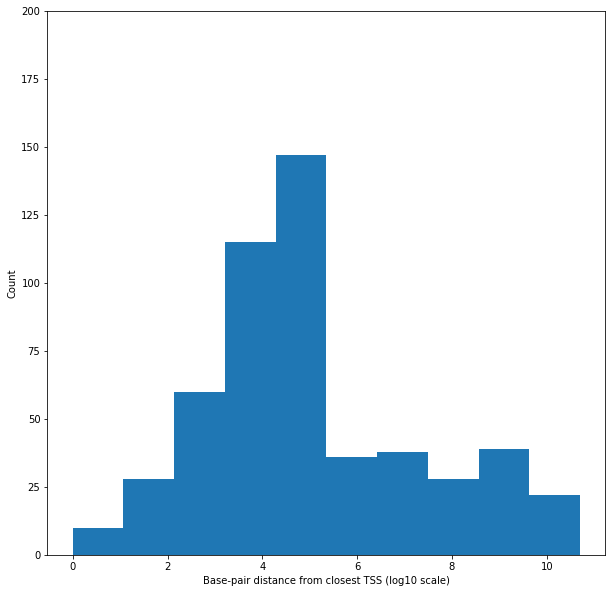

In [61]:
fig, ax = plt.subplots(figsize=(10,10))


plt.hist(np.log(matched_control_df['abs_dist'].astype(float) + 1))

plt.xlabel('Base-pair distance from closest TSS (log10 scale)')
plt.ylabel('Count')
plt.ylim(0, 200)
fig.savefig('Denovodb_benign.TSS-distance-distr.pdf', bbox_inches='tight')
